In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def obj_func(m):
    u, s, vh = np.linalg.svd(m)

    return np.sum(s[1:])

def comp_grad(m, boolMask, obj_func, n):
    """ Computes gradient that maximizes the objective function """
    epsilon = 1e-3

    # Yes, grad is a vector now
    grad = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad.append((obj_func(m + diff) - obj_func(m - diff))/(2*epsilon))

    return grad

def comp_hessian(m, boolMask, of, n):
    """ Computes hessian (only diagonal) """
    vector = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                vector.append(m[i,j])

    q = len(vector)

    epsilon = 1e-3
    hessian = np.zeros([q, q])

    # fill in the diagonal first
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:

                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                hessian[count,count] = (of(m + diff) + of(m - diff) - 2*of(m))/epsilon**2

                count = count + 1
                
    # now fill in off-diagonals
    count1 = 0
    for i1 in range(n):
        for j1 in range(n):
            if boolMask[i1,j1]: # found one
                diff1 = np.zeros([n,n])
                diff1[i1,j1] = epsilon

                count2 = 0
                for i2 in range(n):
                    for j2 in range(n):
                        if boolMask[i2,j2]: # found another one
                            diff2 = np.zeros([n,n])
                            diff2[i2,j2] = epsilon

                            if count1 != count2: # doing only off-diagonal ones
                                hessian[count1,count2] = (of(m + diff1 + diff2) + of(m - diff1 - diff2)
                                                         - of(m + diff1 - diff2) - of(m - diff1 + diff2))/(2*epsilon)**2

                            count2 = count2 + 1

                count1 = count1 + 1

    return hessian

In [3]:
n = 10
p = 0.5
rank = 1

U = np.random.randn(n, rank)
V = np.random.randn(n, rank)
original = np.dot(U, V.T)
mask = np.random.choice([0, 1], size=(n,n), p=[1-p, p])

boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))

In [4]:
current_point = np.copy(original)

zeros = np.zeros([n,n])
current_point[boolMask] = zeros[boolMask]

print("step, nuc norm, frob distance, hessian cond")#, grad mean, grad std, grad min, grad max")
nuc_norms = []
frob_norms = []
conds = []

for step in range(10000):

    hessian = comp_hessian(current_point, boolMask, obj_func, n)
    grad = comp_grad(current_point, boolMask, obj_func, n)

    #descent = -np.dot(np.linalg.inv(hessian), grad)
    descent = -np.array(grad)
    
    descent_matrix = np.zeros([n,n])
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                descent_matrix[i,j] = descent[count]
                count = count + 1
    
    current_point = current_point + 0.1*descent_matrix
    
    nuc_norms.append(np.linalg.norm(current_point,'nuc'))
    frob_norms.append(np.linalg.norm(current_point-original,'fro'))
    conds.append(np.linalg.cond(hessian))
    
    if step % 20 == 0:
        print(step, np.linalg.norm(current_point,'nuc'), np.linalg.norm(current_point-original,'fro'),
              np.linalg.cond(hessian))#, np.mean(np.abs(grad)),
             # np.std(np.abs(grad)), np.min(np.abs(grad)), np.max(np.abs(grad)))
    

step, nuc norm, frob distance, hessian cond
0 11.606523832430977 7.956168757179823 458088.60985252215
20 10.591191726527711 6.41480634947951 49057.871227826785
40 10.268705963114783 4.923451240117212 281043.6693446261
60 10.10827653832663 3.5283855096965406 12454.369631870259
80 10.087351538159062 2.3362670919244533 983706.329662635
100 10.190603180677552 1.5065201996400857 79608.27516630582
120 10.273424630120878 0.8934613957174469 211764.41181592533
140 10.327239348900632 0.3873045631093339 201605.63130449702
160 10.35249314087542 0.14671364463225683 404207.45682036923
180 10.422878212260773 0.14074396345553838 4255918.057300827
200 10.427708346693226 0.13908594715695374 9225999.578998396
220 10.429845603085532 0.13804714855355188 4805829.638050376
240 10.43098316176404 0.13753923622546865 4607755.6981719555
260 10.431632180853073 0.13732652148349472 4820931.524419619
280 10.432103898392262 0.13721824475575034 4856408.169283259
300 10.432502339534642 0.13715486134957933 4691668.05443

KeyboardInterrupt: 

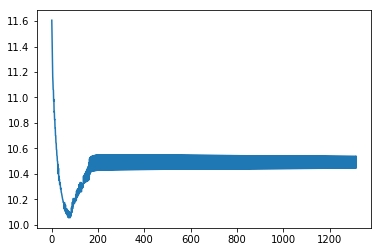

In [5]:
plt.plot(nuc_norms)

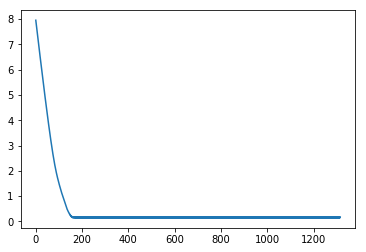

In [6]:
plt.plot(frob_norms)

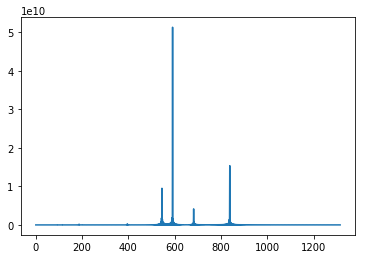

In [7]:
plt.plot(conds)

(array([1.295e+03, 1.100e+01, 3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

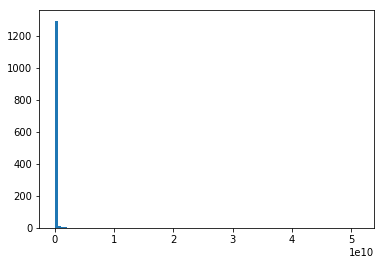

In [8]:
plt.hist(conds,100)